# ASL Model

David René Langarica Hernández | A01708936

## Importar librerias e indicar directorios

En primer lugar, se importan las librerias necesarias y se declaran variables que van a representar los directorios en dónde se encuentran nuestras imagenes.

In [26]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [27]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Data Augmentation

A razón de que nuestros datasets son manos y las imagenes son muy similares entre sí, es necesario hacer data augmentation para evitar el overfitting. Para esto, se utilizarán las siguientes técnicas:
- Escala
- Rotación
- Traslación
- Zoom
- Flip horizontal
- Cambiar brillo

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Generador

Con nuestros generadores de train, test y validation, podemos crear un flujo de datos para alimentar nuestro modelo. Esto nos permitirá cargar las imágenes en lotes y aplicar las técnicas de data augmentation en tiempo real. Además, podemos utilizar el método `flow_from_directory` para cargar las imágenes desde una carpeta y etiquetarlas automáticamente según la estructura de carpetas.

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

Found 61418 images belonging to 7 classes.
Found 4200 images belonging to 7 classes.
Found 1680 images belonging to 7 classes.


## Array de clases

El array de clases es un arreglo que contiene las etiquetas de las clases que queremos predecir. En este caso, las clases son las primeras 7 letras del abecedario en ASL. Este array se utilizará para mapear las etiquetas numéricas a las letras correspondientes. El array se puede crear a partir de los nombres de las carpetas en el directorio de entrenamiento.

In [30]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## Ejemplos de clases

A continuación se muestran algunos ejemplos de las clases que se utilizarán en el modelo. Estas imágenes son representativas de las letras A, B, C, D, E, F y G en ASL.

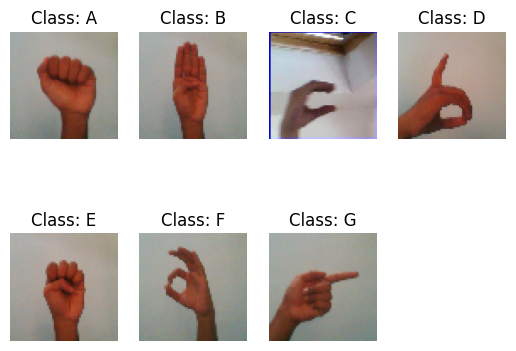

In [31]:
class_examples = {}
num_classes = len(class_names) 

while len(class_examples) < num_classes:
    images, labels = next(train_generator)
    for i in range(len(images)):
        class_idx = np.argmax(labels[i])
        if class_idx not in class_examples and class_idx < num_classes:
            class_examples[class_idx] = images[i]
    
    if len(class_examples) == num_classes:
        break


plt.figure()

for i, class_idx in enumerate(sorted(class_examples.keys())):
    plt.subplot(2, 4, i + 1)
    plt.imshow(class_examples[class_idx])
    plt.title(f'Class: {class_names[class_idx]}')
    plt.axis('off')

plt.show()

In [ ]:
model = Sequential([
    # First Conv Block
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    # Second Conv Block
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    # Third Conv Block
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    
    # Dense layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])
model.summary()

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,284,615 (8.72 MB)

 Trainable params: 2,284,615 (8.72 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss = "categorical_crossentropy", metrics=['accuracy'])

In [34]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.0001,
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 276s 142ms/step - accuracy: 0.6974 - loss: 0.7554 - val_accuracy: 0.9315 - val_loss: 0.2484 - learning_rate: 5.0000e-04
Epoch 2/10
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 260s 136ms/step - accuracy: 0.9710 - loss: 0.0740 - val_accuracy: 0.9423 - val_loss: 0.4306 - learning_rate: 5.0000e-04
Epoch 3/10
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 259s 135ms/step - accuracy: 0.9879 - loss: 0.0327 - val_accuracy: 0.9720 - val_loss: 0.2192 - learning_rate: 5.0000e-04
Epoch 4/10
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 260s 135ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9827 - val_loss: 0.0661 - learning_rate: 5.0000e-04
Epoch 5/10
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 263s 137ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9113 - val_loss: 0.3853 - learning_rate: 5.0000e-04
Epoch 6/10
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9964 - loss: 0.0096
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1920/1920 ━━━━━━━━━━━━━

In [35]:
test_loss, test_acc = model.evaluate(test_generator)

print('\nTest accuracy:', test_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8908 - loss: 0.6677

Test accuracy: 0.8976190686225891


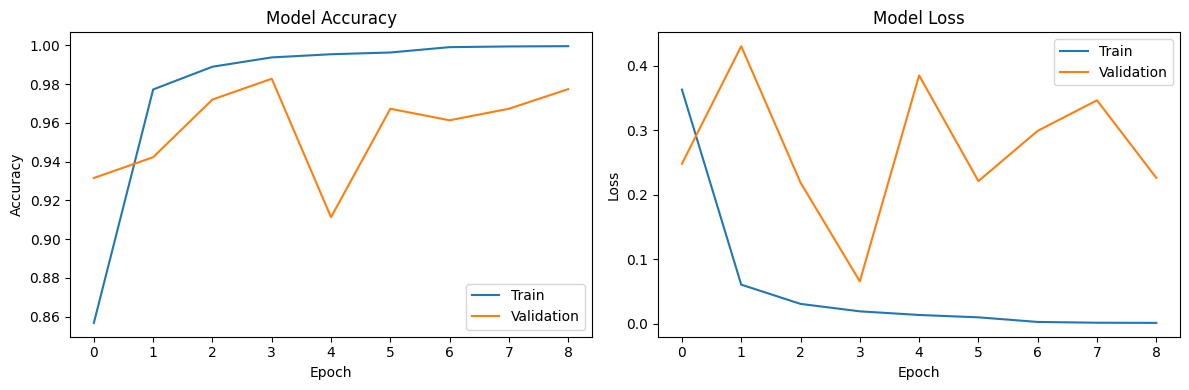

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step


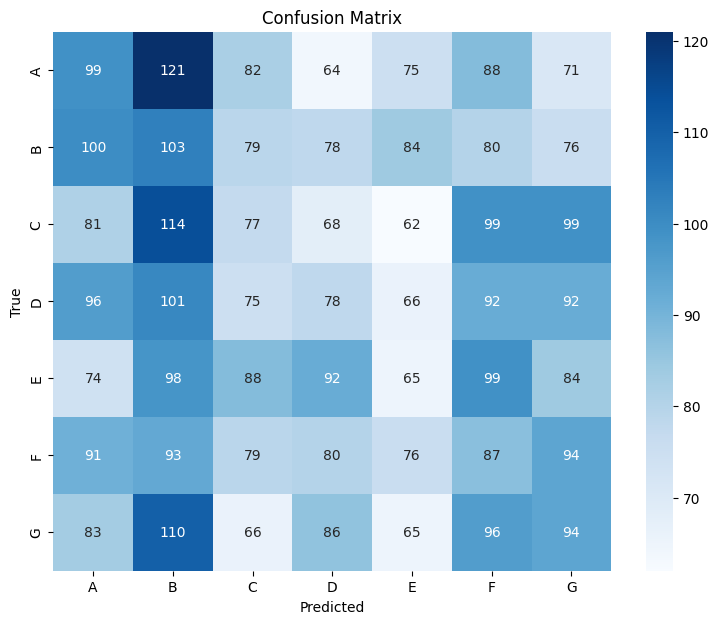

              precision    recall  f1-score   support

           A       0.16      0.17      0.16       600
           B       0.14      0.17      0.15       600
           C       0.14      0.13      0.13       600
           D       0.14      0.13      0.14       600
           E       0.13      0.11      0.12       600
           F       0.14      0.14      0.14       600
           G       0.15      0.16      0.16       600

    accuracy                           0.14      4200
   macro avg       0.14      0.14      0.14      4200
weighted avg       0.14      0.14      0.14      4200



In [37]:
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

test_generator.reset()
y_true = []
for i in range(len(test_generator)):
    _, labels = next(test_generator)
    y_true.extend(np.argmax(labels, axis=1))
    if len(y_true) >= len(y_pred_classes):
        y_true = y_true[:len(y_pred_classes)]
        break

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_names))